# How to run DTW-CAI
DTW-CAI is the second proposed technique in the paper. 

It calculates pairwise DTW-CAI distances between time series with missing values in a dataset.

It is a _global method_; i.e., it requires the full dataset to compute pairwise distances.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import dtw_missing.experiments as exp

Create a simple dataset:

In [2]:
dataset = np.array([[1, 1, 1, 5, 5, 2, 2], 
                    [1, 5, 5, 5, 5, 5, 2], 
                    [1.5, 5, 2, 2, 2, 2, 2], 
                    [10, 10, 10, 10, 10, 10, 10]
                  ])
N = len(dataset) # #instances

Contaminate the dataset:

In [3]:
dataset[0, 2] = np.nan
dataset[1, 2:4] = np.nan
dataset[2, -1] = np.nan
dataset[3, 0:4] = np.nan

Set the parameters:

In [4]:
# DTW-CAI is based on DTW-AROW, so can set DTW-AROW parameters as well.
dtw_params = {
    'window' : None,
    'max_dist' : None,
    'use_pruning' : False,
    'max_step' : None,
    'max_length_diff' : None,
    'penalty' : None,
    'psi' : None, #(2, 3, 4, 5), # (begin series1, end series1, begin series2, end series2)
    'psi_neg' : True,
    'use_c' : False,
    'use_ndim' : False,
}

In [5]:
dtw_cai_params = dict(no_clusters='elbow', 
                      no_clusters_range_for_elbow=(2,4),
                     )

Run the DTW-CAI algorithm to compute pairwise DTW-CAI distances in the dataset:

Computing DTW-AROW distances...


100%|██████████| 4/4 [00:00<00:00, 83.94it/s]


Executing the clustering in DTW-CAI...
Running the elbow method ...


/cw/dtaijupiter/NoCsBack/dtai/aras/miniconda3/envs/missing_dtw_public/lib/python3.11/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/cw/dtaijupiter/NoCsBack/dtai/aras/miniconda3/envs/missing_dtw_public/lib/python3.11/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


DBA initialized by the medoid

Iteration0:


updating the means: 100%|██████████| 3/3 [00:00<00:00, 1842.30it/s]



Iteration1:


imputing: 100%|██████████| 3/3 [00:00<00:00, 15.21it/s]


cluster 0 (counting from 0) has a completely missing mean! Assigning another instance to it...
cluster 1 (counting from 0) is empty! Assigning another instance to it...
cluster 2 (counting from 0) is empty! Assigning another instance to it...


updating the means: 100%|██████████| 3/3 [00:00<00:00, 3431.39it/s]



Iteration2:


updating the means: 100%|██████████| 3/3 [00:00<00:00, 2741.38it/s]



Iteration3:


updating the means: 100%|██████████| 3/3 [00:00<00:00, 2210.24it/s]



Iteration4:


imputing: 100%|██████████| 3/3 [00:00<00:00, 83.77it/s]



Calculating DRW-AROW distances based on the imputed data...


100%|██████████| 4/4 [00:00<00:00, 2791.09it/s]

DTW-CAI completed.


array([[ 0.        ,  4.5126086 ,  4.64578662, 15.42724862],
       [ 4.5126086 ,  0.        ,  4.8194681 , 14.12444689],
       [ 4.64578662,  4.8194681 ,  0.        , 14.11067366],
       [15.42724862, 14.12444689, 14.11067366,  0.        ]])

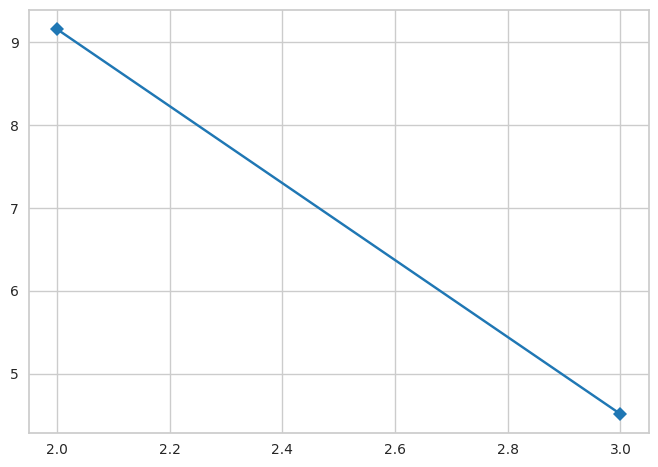

In [6]:
e_dtw_cai = exp.Experiment()
e_dtw_cai.dataset = dataset
e_dtw_cai.compute_pairwise_distances('dtw_cai', 
                                     missing_method_params=[dtw_params, dtw_cai_params],
                                     progress_bar=True, n_jobs=-1)